# 多尺度目标检测



In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

img = d2l.plt.imread('../img/catdog.jpg')
# 提取前两个维度：高度h和宽度w
h, w = img.shape[:2]
h, w

(231, 294)

在特征图（`fmap`）上生成锚框（`anchors`），每个单位（像素）作为锚框的中心

In [2]:
'''
fmap_w, fmap_h: 特征图的空间尺寸（宽、高，单位：格子数）
s: 锚框的基础尺寸（size），可以是单个值或列表
'''
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize()
    '''
    形状:(batch=1,channels=10,height=fmap_h,width=fmap_w)
    目的:multibox_prior只需要空间尺寸fmap_h和fmap_w，通道数用10占位
    逻辑:在fmap_h×fmap_w的每个格子上生成锚框
    '''
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    '''
    在每个特征图格子上生成锚框
    sizes=s:锚框相对于原图的相对大小（如 0.2 表示占原图20%）
    ratios=[1, 2, 0.5]: 三种长宽比（正方形、高2倍的矩形、宽2倍的矩形）
    输出: anchors 形状为 (1, num_anchors, 4)，归一化坐标
    示例: 若 fmap_h=2, fmap_w=2, ratios=[1,2,0.5]，则每个格子生成3个锚框，共 2×2×3=12 个。
    '''
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = torch.tensor((w, h, w, h)) # [x_min, y_min, x_max, y_max]
    '''
    d2l.plt.imshow(img): 显示原图
    .axes: 获取坐标轴对象
    anchors[0]: 取出批次维度，形状 (num_anchors, 4)
    * bbox_scale: 坐标放大，从归一化值 → 像素坐标
    d2l.show_bboxes(...): 在图上绘制所有锚框
    '''
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)

探测小目标

e:\Anaconda3\envs\DL\lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


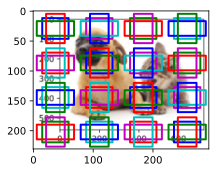

In [3]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

将特征图的高度和宽度减小一半，然后使用较大的锚框来检测较大的目标

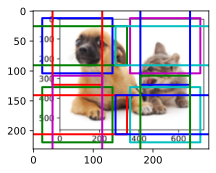

In [4]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

将特征图的高度和宽度减小一半，然后将锚框的尺度增加到0.8

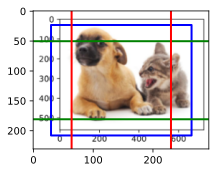

In [5]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])